In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import joblib
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
file_path = "/content/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#x = Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,CALC,MTRANS,IMC
#y = NObeyesdad(Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

In [ ]:
df.duplicated().sum()

np.int64(24)

In [3]:
df.drop_duplicates()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df["IMC"] = df['IMC'] = df['Weight'] / df['Height']**2
#MinMaxScaler
scaler = MinMaxScaler()

df[["Height","Weight","IMC"]] = scaler.fit_transform(df[['Height', 'Weight',"IMC"]])
df[["Age"]] = scaler.fit_transform(df[["Age"]])

In [5]:
df[['family_history_with_overweight', 'FAVC','SMOKE', 'SCC']] = df[['family_history_with_overweight', 'FAVC','SMOKE', 'SCC']].replace({'yes': True, 'no': False})
df[['family_history_with_overweight','FAVC',"SMOKE","SCC"]] = df[['family_history_with_overweight','FAVC',"SMOKE","SCC"]].astype(bool)
df[['family_history_with_overweight','FAVC',"SMOKE","SCC"]]  = df[['family_history_with_overweight','FAVC',"SMOKE","SCC"]].astype(int)

<ipython-input-5-1eca9e1a46d7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['family_history_with_overweight', 'FAVC','SMOKE', 'SCC']] = df[['family_history_with_overweight', 'FAVC','SMOKE', 'SCC']].replace({'yes': True, 'no': False})


In [6]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Gender'] = df['Gender'].astype(int)

<ipython-input-6-d53b6fe1a969>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


In [7]:
df[["FCVC","NCP","CH2O","FAF","TUE"]]= df[["FCVC","NCP","CH2O","FAF","TUE"]].astype(int)

In [8]:
df['CAEC'] = df['CAEC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype(int)
df['CALC'] = df['CALC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype(int)

<ipython-input-8-83ce4ac6997d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CAEC'] = df['CAEC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype(int)
<ipython-input-8-83ce4ac6997d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CALC'] = df['CALC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype(int)


In [ ]:
#df['MTRANS'] = df['MTRANS'].replace({'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Automobile': 3, 'Public_Transportation':4}).astype(int)

<ipython-input-10-fff5a6c228a6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MTRANS'] = df['MTRANS'].replace({'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Automobile': 3, 'Public_Transportation':4}).astype(int)


In [9]:
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6}).astype(int)

<ipython-input-9-df3b56fc4b06>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6}).astype(int)


In [10]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
df[['FCVC','NCP','FAF']] = scaler.fit_transform(df[['FCVC','NCP','FAF']])

mtrans_encoded = ohe.fit_transform(df[['MTRANS']])
mtrans_cols = ohe.get_feature_names_out(['MTRANS'])
mtrans_df = pd.DataFrame(mtrans_encoded, columns=mtrans_cols, index=df.index)

df = pd.concat([df.drop('MTRANS', axis=1), mtrans_df], axis=1)

joblib.dump(ohe,"one-hot_encoder.pkl")
joblib.dump(scaler,"minmaxscaler.pkl")

['minmaxscaler.pkl']

In [11]:
df.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,IMC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,0.148936,0.320755,0.186567,1,0,0.5,0.666667,1,0,...,0,0.000000,1,0,1,0.301127,0.0,0.0,1.0,0.0
1,1,0.148936,0.132075,0.126866,1,0,1.0,0.666667,1,1,...,1,1.000000,0,1,1,0.297206,0.0,0.0,1.0,0.0
2,0,0.191489,0.660377,0.283582,1,0,0.5,0.666667,1,0,...,0,0.666667,1,2,1,0.284704,0.0,0.0,1.0,0.0
3,0,0.276596,0.660377,0.358209,0,0,1.0,0.666667,1,0,...,0,0.666667,0,2,2,0.366316,0.0,0.0,0.0,1.0
4,0,0.170213,0.622642,0.379104,0,0,0.5,0.000000,1,0,...,0,0.000000,0,1,3,0.405728,0.0,0.0,1.0,0.0
5,0,0.319149,0.320755,0.104478,0,1,0.5,0.666667,1,0,...,0,0.000000,0,1,1,0.190298,0.0,0.0,0.0,0.0
6,1,0.191489,0.094340,0.119403,1,1,1.0,0.666667,1,0,...,0,0.333333,0,1,1,0.302659,0.0,1.0,0.0,0.0
7,0,0.170213,0.358491,0.104478,0,0,0.5,0.666667,1,0,...,0,1.000000,0,1,1,0.177353,0.0,0.0,1.0,0.0
8,0,0.212766,0.622642,0.186567,1,1,1.0,0.666667,1,0,...,0,0.333333,1,2,1,0.190413,0.0,0.0,1.0,0.0
9,0,0.170213,0.509434,0.216418,1,1,0.5,0.666667,1,0,...,0,0.333333,1,0,1,0.264079,0.0,0.0,1.0,0.0


In [12]:
df.dtypes

,0
Gender,int64
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,int64
FAVC,int64
FCVC,float64
NCP,float64
CAEC,int64
SMOKE,int64


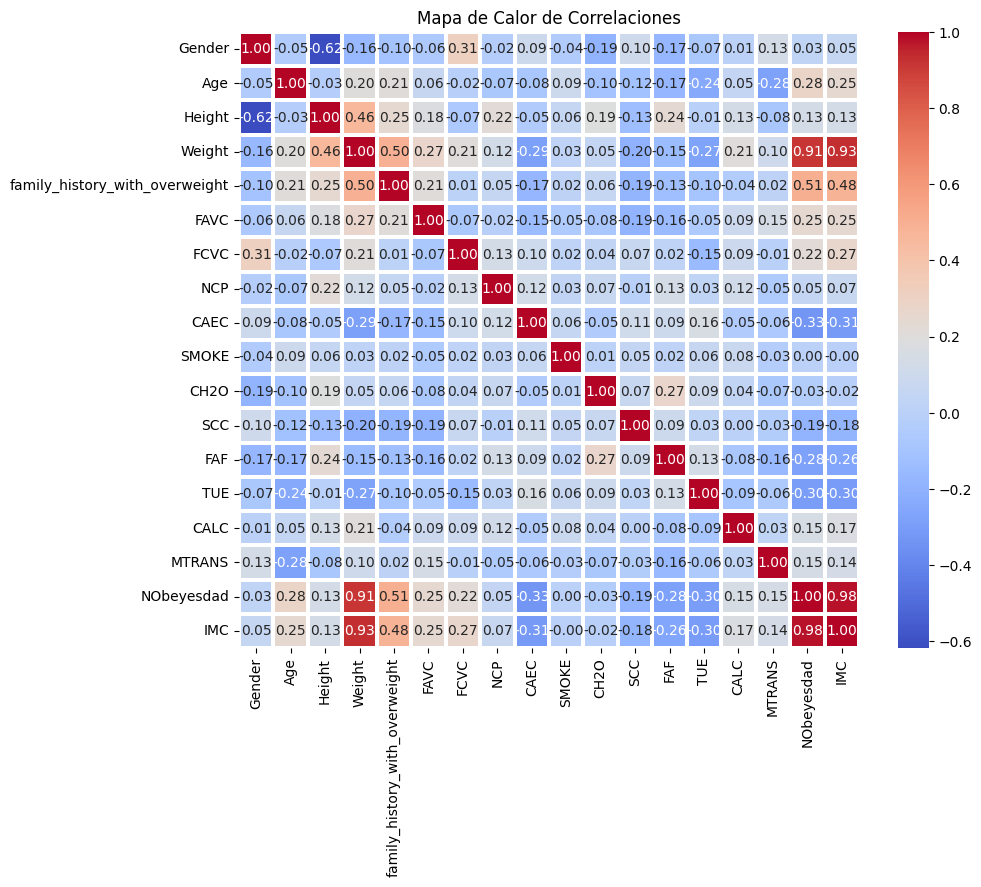

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=1.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


x = df[["Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","SMOKE","FAF","CALC","IMC","MTRANS_Bike",	"MTRANS_Motorbike",	"MTRANS_Public_Transportation",	"MTRANS_Walking"]]
y = df["NObeyesdad"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)



In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, random_state=42)
model.fit(x_train, y_train)
#Guardar modelo
joblib.dump(model, "modelo_RF.pkl")

['modelo_RF.pkl']

In [ ]:
#XGBoost
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
model.fit(x_train, y_train)
#Guardar modelo
joblib.dump(model, "modelo_XGBoost.pkl")

['modelo_XGBoost.pkl']

In [ ]:
pip install --upgrade tensorflow

In [ ]:
np.unique(y_test)

array([0., 1.])

In [22]:
num_classes = 7
input_size = x.shape[1]

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

#Compilar
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128, epochs=100,
          verbose=1)
#Hace que el modelo finalice antes de que haya overfitting
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

model.fit(x_train, y_train,
          batch_size=128, epochs=100,
          validation_data=(x_test, y_test),
          verbose=1,
          callbacks=[early_stopping])

#Guardar modelo
model.save("modelo_keras.h5")
joblib.dump(model,"modelo_keras.pkl")

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.3500 - loss: 2.1130
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6052 - loss: 1.1512 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6609 - loss: 0.9658 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7102 - loss: 0.7681 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7255 - loss: 0.7525 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7749 - loss: 0.6081 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8057 - loss: 0.5157 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8154 - loss: 0.4738 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8265 - loss: 0.4700 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8331 - loss: 0.4237 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8541 - loss: 0.3851 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

['modelo_keras.pkl']

In [ ]:
#Deep learning
from tensorflow import keras
from tensorflow.keras import layers

y_train_cat = to_categorical(y_train,num_classes=7)
y_test_cat = to_categorical(y_test,num_classes=7)

#modelo
num_classes = 7
input_size = x.shape[1]


model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_size,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

#Compilar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train_cat,
          batch_size=128, epochs=100,
          verbose=1)
#Guardar modelo
model.save("modelo_keras2.h5")
joblib.dump(model,"modelo_kerasV2.pkl")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.1766 - loss: 1.9118
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2948 - loss: 1.7935  
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4098 - loss: 1.6738 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4880 - loss: 1.5242 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5695 - loss: 1.3618 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6130 - loss: 1.2044 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6325 - loss: 1.1084 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 1.0080 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.9149 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7460 - loss: 0.8560 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7734 - loss: 0.7840 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

['modelo_kerasV2.pkl']

In [ ]:
pip install --upgrade torch

In [ ]:
#Deep learning Pytorch
import torch
import torch.nn as nn


input_size = x.shape[1]
#modelo
modelo = nn.Sequential(
    nn.Linear(input_size, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, num_classes),
    nn.Softmax(dim=1)
)
#gurdar modelo
torch.save(model, "modelo_pytorch.pth")

In [ ]:
#Comprobación de puntería
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

modelo_RF = joblib.load("modelo_RF.pkl")
modelo_XGBoost = joblib.load("modelo_XGBoost.pkl")

#RF
y_pred = modelo_RF.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Modelo Random Forest: {accuracy:.2f}")

#XGBoost
y_pred = modelo_XGBoost.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Modelo XGBoost: {accuracy:.2f}")


modelo_keras = keras.models.load_model("modelo_keras.h5")
modelo_pytorch = torch.load("modelo_pytorch.pth", weights_only=False)


score = modelo_keras.evaluate(x_test, y_test)
print(["Modelo Keras accuracy: ", score[1]])


# Inicializar variables para contar predicciones correctas
correct = 0
total = 0
x_test = x_test.to_numpy()
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Desactivar gradientes para ahorrar memoria
for inputs, labels in test_loader:
    # Realizar predicciones
    outputs = model(inputs)  # Predicciones del modelo
    # Obtener la clase con mayor probabilidad (predicción)
    predicted = tf.argmax(outputs, axis=1)
    # Convertir labels a formato de clase si está en one-hot encoding
    labels = tf.argmax(labels, axis=1)
    # Contar aciertos
    correct += tf.reduce_sum(tf.cast(tf.equal(predicted, labels), tf.int32)).numpy()  # Contar aciertos
    total += labels.shape[0] # Total de muestras

# Calcular precisión en porcentaje
accuracy = correct / total * 100
print(f'Accuracy Modelo Pytorch: {accuracy:.2f}%')



In [ ]:
modelo_keras = keras.models.load_model("modelo_keras.h5")
modelo_keras2 = keras.models.load_model("modelo_keras2.h5")

score = modelo_keras.evaluate(x_test, y_test)
print(["Modelo Keras accuracy: ", score[1]])
score2 = modelo_keras2.evaluate(x_test, y_test_cat)
print(["Modelo Keras accuracy: ", score2[1]])

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9471 - loss: 0.1578
['Modelo Keras accuracy: ', 0.9527186751365662]
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9379 - loss: 0.1340
['Modelo Keras accuracy: ', 0.9456264972686768]
